# User Story
Bay is a small payment processing company. The business team is interested in forecasting GMV (Gross Merchandise Value), which is defined as the sum of transaction amounts over a period of time. 

The business team has provided you with the following datasets:

### transactions
### stores
### users 

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as mfm

In [2]:
# Read datasets
transactions_df = pd.read_csv('transactions.csv')
stores_df = pd.read_csv('stores.csv')
users_df = pd.read_csv('users.csv')

### Transactions

In [3]:
transactions_df.info()
transactions_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582260 entries, 0 to 1582259
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   id                1582260 non-null  object
 1   user_id           1582260 non-null  object
 2   store_id          1582260 non-null  object
 3   event_occurrence  1582260 non-null  object
 4   amount            1582260 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 60.4+ MB


,id,user_id,store_id,event_occurrence,amount
0,a555eb55-1da4-6087-b5ab-06b35b608002,93098549-3ff0-e579-01c3-df9183278f64,a3c7874b-75df-9cf2-62ab-cf58be5d9e0e,2020-01-01 06:40:43.323987,315
1,f699b867-e70c-5160-90c8-7dfa32dce0da,35ba9da1-98d0-cbb7-7844-e648601b7208,1d59adf3-94f2-f5f8-46c6-8558c544a3a9,2020-01-01 07:04:25.968615,1646
2,5c3f8abc-f4e6-94fd-7b13-fe0efd4e4591,63cb5ee0-a457-9975-5455-4d76109bc754,c835f09d-ac5b-2005-1959-f452456a746a,2020-01-01 07:06:16.164563,385
3,f033da1a-bafb-5faa-67e3-c76b07b04333,786fcb82-40cf-1dc9-b9ba-2541502ca95a,eaf4c05d-13e1-7c8a-9ae0-cf2ec2e3dcd2,2020-01-01 07:07:26.029685,166
4,ccc35ffe-ee42-b696-783c-6670bfd800ec,acc814f5-beb6-db35-64f1-52f7c5a8466c,a8301ae2-df3b-ffe4-0279-c74af1dbb847,2020-01-01 07:12:24.448015,656


In [4]:
transactions_df.describe()

,amount
count,1.582260e+06
mean,1.703913e+03
std,5.361803e+03
min,2.000000e+00
25%,3.320000e+02
50%,7.320000e+02
75%,1.675000e+03
max,1.883119e+06


### Stores


In [5]:
stores_df.info()
stores_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99991 entries, 0 to 99990
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        99991 non-null  object 
 1   nam       99991 non-null  object 
 2   laa       99991 non-null  object 
 3   category  99991 non-null  object 
 4   lat       99991 non-null  float64
 5   lon       99991 non-null  float64
dtypes: float64(2), object(4)
memory usage: 4.6+ MB


,id,nam,laa,category,lat,lon
0,139a9a4b-1cb4-cb91-f718-d0bdd7db31c9,Aichi Ken,Agui Cho,ショッピング,34.951439,136.935126
1,437e0dae-dbf7-b1a8-4a03-010b9597bbd2,Aichi Ken,Agui Cho,マッサージ,34.947078,136.884972
2,2deb0ff0-5909-c169-4a23-4ed3979467fc,Aichi Ken,Agui Cho,その他,34.926083,136.928418
3,093585a3-96ce-7513-4d60-1dd36c4b30d2,Aichi Ken,Agui Cho,カフェ,34.952815,136.889037
4,d0637fde-e4c8-4c60-5817-a3494a623a6f,Aichi Ken,Agui Cho,グルメ,34.922963,136.892997


### Users

In [6]:
users_df.info()
users_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9961 entries, 0 to 9960
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      9961 non-null   object 
 1   gender  8965 non-null   object 
 2   age     9463 non-null   float64
dtypes: float64(1), object(2)
memory usage: 233.6+ KB


,id,gender,age
0,3cf2d95c-851a-3e66-bd62-36050c1aa8dd,M,30.0
1,a85536f3-1bf8-fbeb-d06e-62e6dc5a2a83,M,55.0
2,355a293c-2c15-d6bd-45ce-cd3c275ee5a9,M,40.0
3,61fb5b45-9bf8-1659-7a0c-b6f85a0f870b,NaN,NaN
4,ff9e16ef-3a0b-9373-567f-fb07cbc96874,M,90.0


In [7]:
users_df.describe()

,age
count,9463.000000
mean,52.730318
std,21.441445
min,15.000000
25%,34.000000
50%,52.000000
75%,71.000000
max,90.000000


# Exploratory Data Analysis

### Proprocess

In [8]:
# Users: Bucket 'age' into age groups
age_bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
users_df['age_group'] = pd.cut(users_df['age'], bins=age_bins, labels=age_labels, right=False)

# Merge stores and users to transactions_df
stores_df.rename(columns={'id':'store_id'}, inplace=True)
users_df.rename(columns={'id':'user_id'}, inplace=True)

transactions_merged_df = pd.merge(transactions_df, stores_df, 
                           on='store_id',
                           how='left')

transactions_merged_df = pd.merge(transactions_merged_df, users_df, 
                           on='user_id',
                           how='left')

# Convert event_occurrence to datetime
transactions_merged_df['event_occurrence'] = pd.to_datetime(transactions_merged_df['event_occurrence'])

# Inspect df
transactions_merged_df.info()
transactions_merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582260 entries, 0 to 1582259
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   id                1582260 non-null  object        
 1   user_id           1582260 non-null  object        
 2   store_id          1582260 non-null  object        
 3   event_occurrence  1582260 non-null  datetime64[ns]
 4   amount            1582260 non-null  int64         
 5   nam               1582260 non-null  object        
 6   laa               1582260 non-null  object        
 7   category          1582260 non-null  object        
 8   lat               1582260 non-null  float64       
 9   lon               1582260 non-null  float64       
 10  gender            1421978 non-null  object        
 11  age               1505614 non-null  float64       
 12  age_group         1505614 non-null  category      
dtypes: category(1), datetime64[ns](1), float64

,id,user_id,store_id,event_occurrence,amount,nam,laa,category,lat,lon,gender,age,age_group
0,a555eb55-1da4-6087-b5ab-06b35b608002,93098549-3ff0-e579-01c3-df9183278f64,a3c7874b-75df-9cf2-62ab-cf58be5d9e0e,2020-01-01 06:40:43.323987,315,Saitama Ken,Soka Shi,コンビニ,35.830649,139.809781,M,88.0,81-90
1,f699b867-e70c-5160-90c8-7dfa32dce0da,35ba9da1-98d0-cbb7-7844-e648601b7208,1d59adf3-94f2-f5f8-46c6-8558c544a3a9,2020-01-01 07:04:25.968615,1646,Gunma Ken,Meiwa Cho,ショッピング,36.216801,139.562541,M,44.0,41-50
2,5c3f8abc-f4e6-94fd-7b13-fe0efd4e4591,63cb5ee0-a457-9975-5455-4d76109bc754,c835f09d-ac5b-2005-1959-f452456a746a,2020-01-01 07:06:16.164563,385,Hiroshima Ken,Fukuyama Shi,コンビニ,34.642260,133.257595,M,16.0,0-18
3,f033da1a-bafb-5faa-67e3-c76b07b04333,786fcb82-40cf-1dc9-b9ba-2541502ca95a,eaf4c05d-13e1-7c8a-9ae0-cf2ec2e3dcd2,2020-01-01 07:07:26.029685,166,Tokyo To,Nerima Ku,グルメ,35.762485,139.661923,F,79.0,71-80
4,ccc35ffe-ee42-b696-783c-6670bfd800ec,acc814f5-beb6-db35-64f1-52f7c5a8466c,a8301ae2-df3b-ffe4-0279-c74af1dbb847,2020-01-01 07:12:24.448015,656,Tokyo To,Edogawa Ku,スーパーマーケット,35.692503,139.863613,F,79.0,71-80


## Transaction Analysis
### 1. Total GMV Over Time

Plot the total GMV over time to identify trends, seasonality, or any outliers.

/Users/tinohuang/anaconda3/envs/paypay/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tinohuang/anaconda3/envs/paypay/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


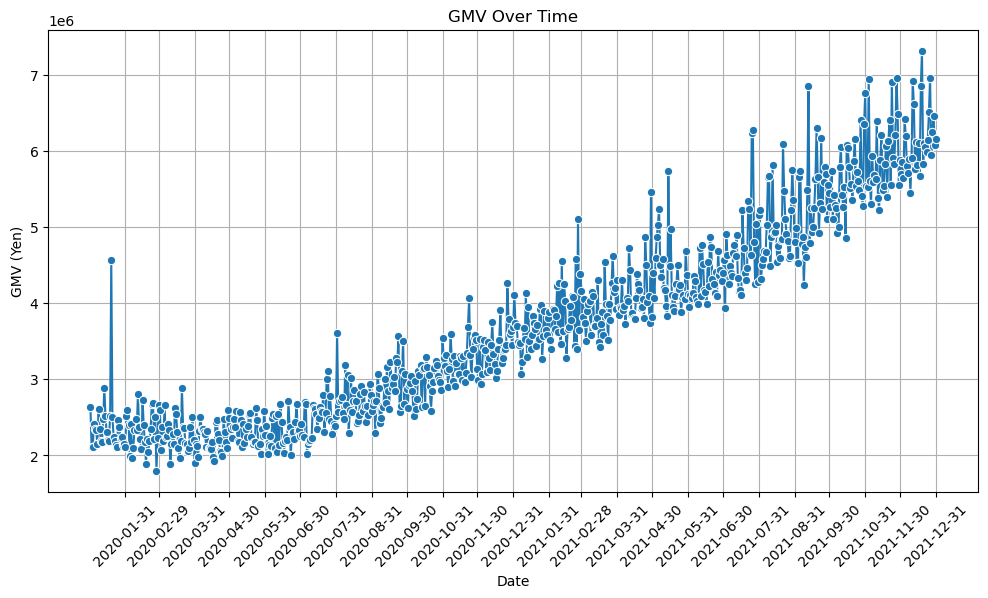

In [9]:
# Aggregate GMV over time
gmv_over_time = transactions_merged_df.groupby(transactions_merged_df['event_occurrence'].dt.date)['amount'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=gmv_over_time, x='event_occurrence', y='amount', marker='o', linestyle='-')
plt.title('GMV Over Time')
plt.xlabel('Date')
plt.ylabel('GMV (Yen)')
plt.gca().set_xticks(pd.date_range(start=gmv_over_time['event_occurrence'].min(), 
                                   end=gmv_over_time['event_occurrence'].max(), 
                                   freq='M')) 
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 2. GMV by Store Category and Prefecture

This analysis will help us understand which categories and prefectures are contributing most to the GMV.

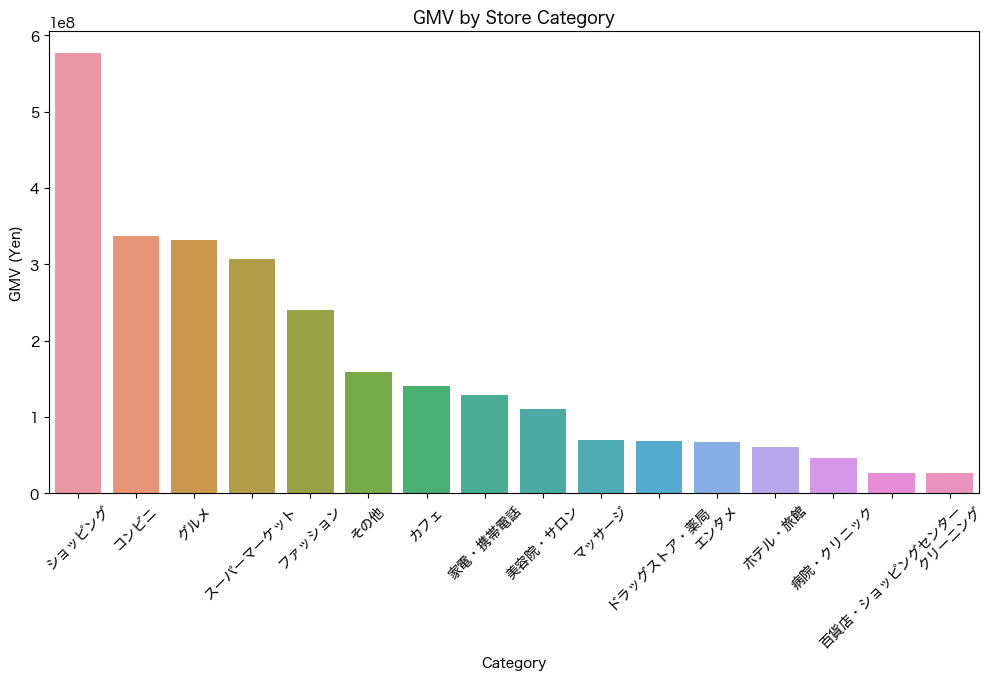

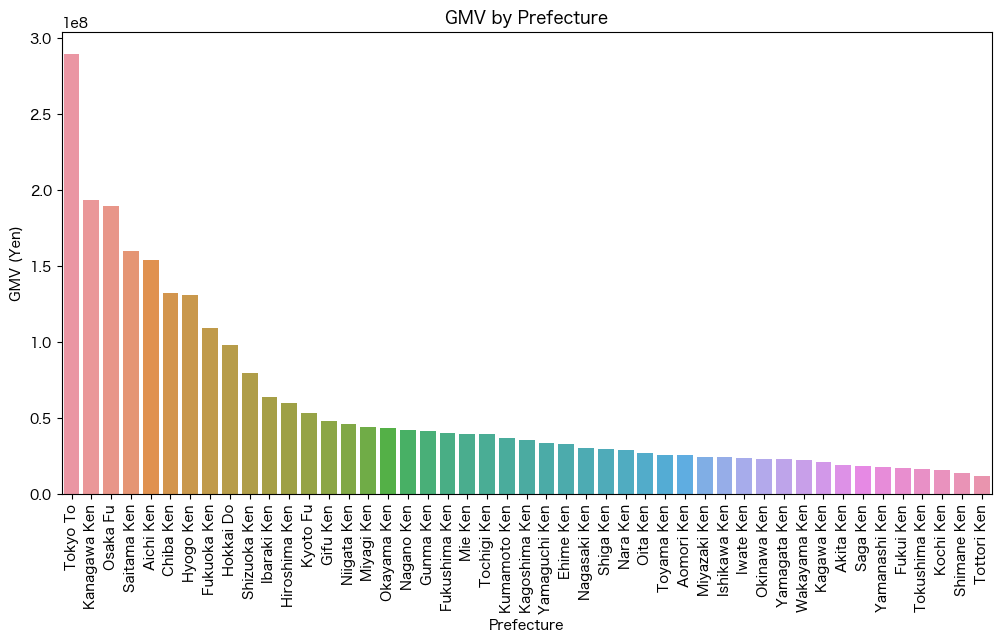

In [10]:
# Aggregate GMV by store category
gmv_by_category_df = transactions_merged_df.groupby('category')['amount'].sum().reset_index()
gmv_by_category_df.columns = ['Category', 'GMV']
gmv_by_category_df = gmv_by_category_df.sort_values('GMV', ascending=False)

# Aggregate GMV by prefecture
gmv_by_prefecture_df = transactions_merged_df.groupby('nam')['amount'].sum().reset_index()
gmv_by_prefecture_df.columns = ['Prefecture', 'GMV']
gmv_by_prefecture_df = gmv_by_prefecture_df.sort_values('GMV', ascending=False)

# Set font for plots
font_prop = mfm.FontProperties()
font_prop.set_family('Hiragino Sans')
font_prop.set_size(14)
plt.rcParams['font.family'] = font_prop.get_name()

# Plot GMV by Store Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='GMV', data=gmv_by_category_df)
plt.title('GMV by Store Category')
plt.ylabel('GMV (Yen)')
plt.xticks(rotation=45)
plt.show()

# Plot GMV by Prefecture
plt.figure(figsize=(12, 6))
sns.barplot(x='Prefecture', y='GMV', data=gmv_by_prefecture_df)
plt.title('GMV by Prefecture')
plt.ylabel('GMV (Yen)')
plt.xticks(rotation=90) 
plt.show()

## User Analysis

### 1. Gender Analysis: comparing transaction_count and GMV by gender

Males have a slightly lower proportion of the GMV (56.7%) compared to their proportion of the number (59.7%). In contrast, females have a higher proportion of the GMV (43.1%) than their proportion of the number (40.1%). This suggests that while there are fewer females than males, their contribution to the total GMV is relatively higher on average.

           count    amount
gender                    
M       0.596988  0.566918
F       0.401115  0.431391
OTHER   0.001896  0.001692


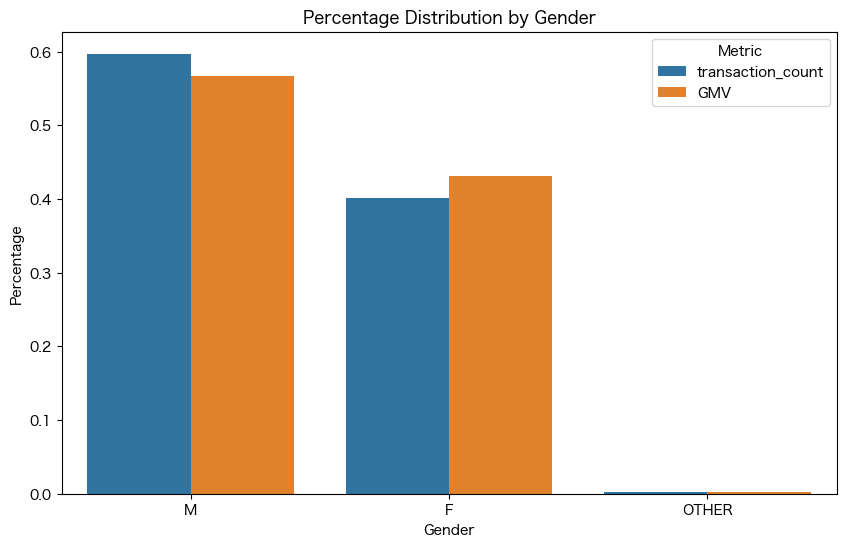

In [11]:
# Count vs. GMV by gender
gender_counts = users_df['gender'].value_counts().reset_index()
gmv_by_gender = transactions_merged_df.groupby('gender')['amount'].sum().reset_index()

# Merge gmv_by_gender with gender_counts
gender_df = pd.merge(gender_counts, gmv_by_gender, 
                     on='gender',
                     how='left').set_index('gender')

# Convert count and GMV to percentages
gender_df = gender_df.div(gender_df.sum())
print(gender_df)

# Reshape the DataFrame to a long format suitable for sns
gender_df = gender_df.reset_index().melt(id_vars='gender', var_name='Metric', value_name='Percentage')
gender_df['Metric'] = gender_df['Metric'].replace('count','transaction_count').replace('amount','GMV')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_df, x='gender', y='Percentage', hue='Metric')

plt.title('Percentage Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Metric')
plt.show()


### 2. Age Analysis: comparing transaction_count and GMV by age group

The data illustrates a peak in contribution to GMV and participation (number) among individuals in their late working years (31-60), with a gradual decrease as age increases beyond 70. The youngest (0-18) and oldest (91-100) age groups contribute the least.

              count    amount
age_group                    
19-30      0.147205  0.146864
31-40      0.141815  0.169114
41-50      0.138857  0.162238
51-60      0.137589  0.165721
61-70      0.133467  0.136213
81-90      0.128500  0.068777
71-80      0.125436  0.122332
0-18       0.032759  0.024664
91-100     0.014372  0.004076


/var/folders/y9/6h_xqm3574s5knj07pyv10xw0000gn/T/ipykernel_8199/3190536647.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gmv_by_ageGroup = transactions_merged_df.groupby('age_group')['amount'].sum().reset_index()
/Users/tinohuang/anaconda3/envs/paypay/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/tinohuang/anaconda3/envs/paypay/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass

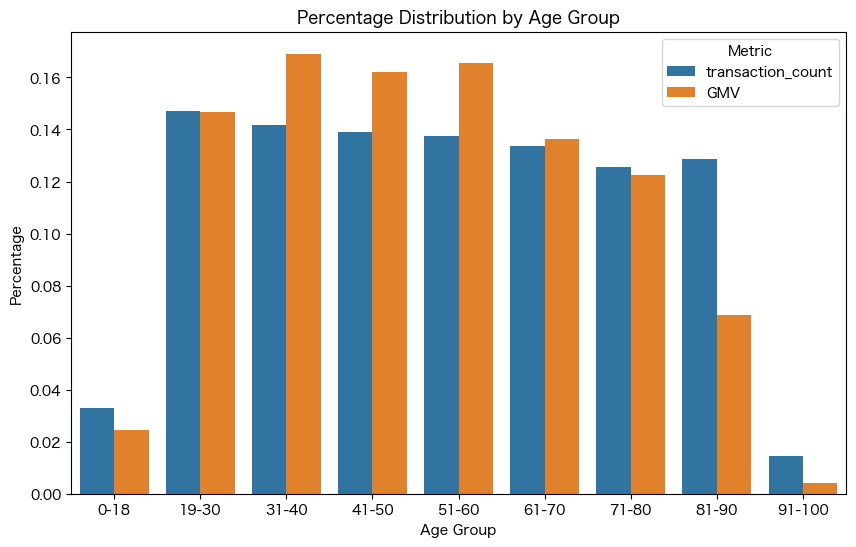

In [12]:
# Count vs. GMV by age_group 
ageGroup_counts = users_df['age_group'].value_counts().reset_index()
gmv_by_ageGroup = transactions_merged_df.groupby('age_group')['amount'].sum().reset_index()

# Merge gmv_by_ageGroup with ageGroup_counts
ageGroup_df = pd.merge(ageGroup_counts, gmv_by_ageGroup, 
                     on='age_group',
                     how='left').set_index('age_group')

# Convert Count' and 'GMV' to percentage
ageGroup_df = ageGroup_df.div(ageGroup_df.sum())
print(ageGroup_df)

# Reshape the DataFrame to a long format suitable for sns
ageGroup_df = ageGroup_df.reset_index().melt(id_vars='age_group', var_name='Metric', value_name='Percentage')
ageGroup_df['Metric'] = ageGroup_df['Metric'].replace('count','transaction_count').replace('amount','GMV')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=ageGroup_df, x='age_group', y='Percentage', hue='Metric')

plt.title('Percentage Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Metric')
plt.show()

# Forecasting GMV for Each User for January 2022 using XGBoost

XGBoost is a powerful gradient boosting framework that can handle regression tasks effectively. We will first aggregate the transactions data on a monthly level per user, then create features that can help the model learn temporal patterns 

### 1. Feature Engineering

In [13]:
# Aggregate monthly spend for each user
agg_cols = ['user_id', pd.Grouper(key='event_occurrence', freq='M')]
df = transactions_merged_df.groupby(agg_cols)\
                           .agg(gender=('gender','max'),
                                age_group=('age_group','max'),
                                T_month_spend=('amount','sum'))\
                           .reset_index()
                                             
df.rename(columns={'event_occurrence':'event_month'},inplace=True)                           
                                
# Add GMV in the past 6 month (X)
gmv_past_months = []
for i in range(1,7):
    col = f'T-{i}_month_gmv'
    df[col] = df.groupby(['user_id'])['T_month_spend'].shift(i)
    df[col].fillna(0,inplace=True)
    gmv_past_months.append(col)

# Add lag features (X)
df['recent_avg_gmv'] = df[gmv_past_months+['T_month_spend']].mean(axis=1)
df['recent_max_gmv'] = df[gmv_past_months+['T_month_spend']].max(axis=1)
df['recent_sum_gmv'] = df[gmv_past_months+['T_month_spend']].sum(axis=1)
df['recent_transaction_freq'] = df[gmv_past_months+['T_month_spend']].apply(lambda x: (x!=0).sum(), axis=1)

# Add time features (X)
df['year'] = df['event_month'].dt.year.astype(str)
df['month'] = df['event_month'].dt.month.astype(str)

# Add GMV in the next month (y)
df['T+1_month_gmv'] = df.groupby(['user_id'])['T_month_spend'].shift(-1)

# One-hot encoding
df = pd.get_dummies(df, columns=['gender', 'age_group', 'year', 'month'])

### 2. Modeling & Evaluation

In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Save Dec 2021 data for Jan 2022 forecasting
hold_out_df = df[df['event_month'] == max(df['event_month'])]

# Prepare features (X) and target (y)
df.set_index(['user_id','event_month'],inplace=True)

# Drop y is null
df = df[~df['T+1_month_gmv'].isnull()]

# Split the data into training and testing sets
X = df.drop(['T+1_month_gmv'], axis=1)
y = df['T+1_month_gmv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up XGBoost grid search
xgb_model = xgb.XGBRegressor(random_state=100, verbosity=0)

# Hyperparameter tuning
param_grid = { 'n_estimators': [100, 200],
               'max_depth': [3, 4],
               'colsample_bytree': [0.7, 0.9],
               'learning_rate': [0.05, 0.1],
               }  

grid_search = GridSearchCV(estimator= xgb_model, 
                           param_grid= param_grid, 
                           scoring='neg_mean_squared_error',
                           cv=5,
                           refit=True,
                           n_jobs = -1)  


# Fit XGBoost with training set
grid_search.fit(X_train, y_train)

# Print GridSearch results
print(grid_search.best_params_)
print('Best neg_mean_squared_error: ', grid_search.best_score_)

# Extract best model pipeline
xgbc_best = grid_search.best_estimator_

# Predict on test set
y_pred = xgbc_best.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")                    

{'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best neg_mean_squared_error:  -382940768.958168
Root Mean Square Error (RMSE): 19300.52477947623


### 3. Forecasting

In [15]:
### Forecast GMV for Each User for Jan 2022 ###
hold_out_df.set_index(['user_id'],inplace=True)
X_holdout = hold_out_df.drop(['T+1_month_gmv','event_month'], axis=1)

forecast = xgbc_best.predict(X_holdout)


# Save users forecasting result
df_users_result= pd.DataFrame({'user_id': hold_out_df.index,
                              'gmv_jan2022': forecast})
                                  
df_users_result.to_csv('users_result.csv')   

### 4. Feature Importance

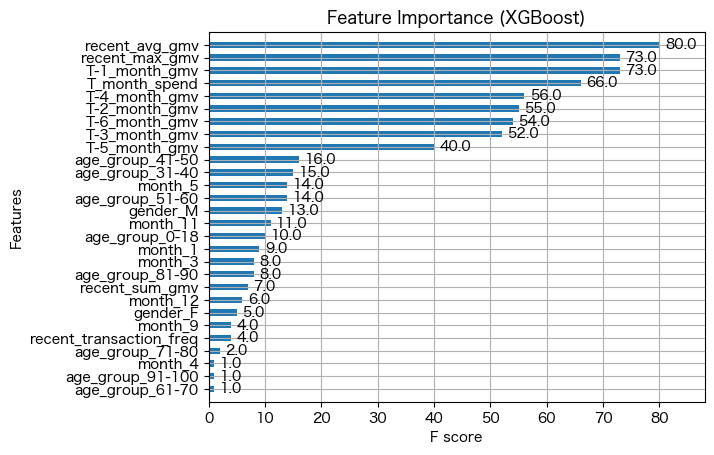

In [16]:
grid_search.best_estimator_.get_booster().feature_names = X_train.columns.tolist()
xgb.plot_importance(grid_search.best_estimator_, 
                    title="Feature Importance (XGBoost)",
                    height=0.5,
                    importance_type='weight')
plt.show() 

# Forecasting GMV for Bay as a Whole for January 2022 using Prophet

Prophet is designed for forecasting with daily observations that display patterns on different time scales. It's well-suited for the total GMV forecasting task, where we aggregate transactions on a daily basis.

/Users/tinohuang/anaconda3/envs/paypay/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
17:54:03 - cmdstanpy - INFO - Chain [1] start processing
17:54:03 - cmdstanpy - INFO - Chain [1] done processing
/Users/tinohuang/anaconda3/envs/paypay/lib/python3.11/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/tinohuang/anaconda3/envs/paypay/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version

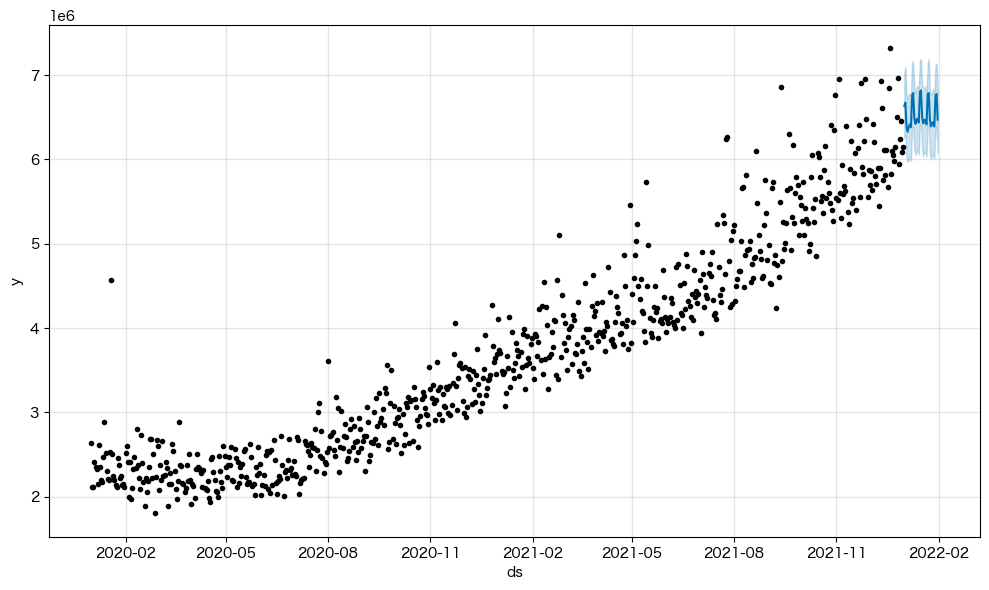

In [17]:
from prophet import Prophet

# Aggregate transactions to daily GMV
df_daily = transactions_merged_df.groupby(pd.Grouper(key='event_occurrence', freq='D'))['amount'].sum().reset_index()
df_daily.columns = ['ds', 'y'] # Prophet requires the columns to be named 'ds' and 'y'

# Splitting the data is not required since Prophet handles cross-validation internally for hyperparameter tuning
 
# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(df_daily)

# Create a df to hold future dates for which predictions are needed (January 2022)
future_dates = model.make_future_dataframe(periods=31, include_history=False)

# Use the model to make predictions
forecast_output = model.predict(future_dates)

# Save result
forecast_output[['ds', 'yhat']].to_csv('Bay_result.csv')

# Plot the forecast
fig = model.plot(forecast_output)
plt.show()